# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
# Combination Starter code, instructor advised

# Scraping
from splinter import Browser
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

# requests
import requests
import time

# parsing
from bs4 import BeautifulSoup

# data science
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [5]:
# Step 3: Extract Data from HTML Table
table = soup.find('table', class_='table')
rows = table.find_all('tr')

# Extract column headings
columns = [header.get_text() for header in rows[0].find_all('th')]

In [6]:
# Create an empty list
data = []

# Loop through the scraped data to create a list of rows
for row in rows[1:]:
    cells = row.find_all('td')
    row_data = [cell.get_text() for cell in cells]
    data.append(row_data)

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(data, columns=columns)

In [8]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [10]:
# Change data types for data analysis
# Step 5: Examine and Cast Data Types
df['id'] = df['id'].astype(int)
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(float)
df['month'] = df['month'].astype(int)
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)

In [11]:
# Confirm type changes were successful by examining data types again
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int32         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int32         
 3   ls                1867 non-null   float64       
 4   month             1867 non-null   int32         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int32(3)
memory usage: 80.3 KB


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155.0,6,-75.0,739.0
1,13,2012-08-17,11,156.0,6,-76.0,740.0
2,24,2012-08-18,12,156.0,6,-76.0,741.0
3,35,2012-08-19,13,157.0,6,-74.0,732.0
4,46,2012-08-20,14,157.0,6,-74.0,740.0


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
mars_months = df['month'].nunique()
print(f"There are {mars_months} months on Mars.")


There are 12 months on Mars.


In [13]:
# 2. How many sols (Martian days) worth of data are there?
martian_days = df['sol'].nunique()
print(f"There are {martian_days} Martian days worth of data.")


There are 1867 Martian days worth of data.


In [14]:
# 3. What is the average minimum temperature by month?
month_avg = df.groupby("month").min_temp.mean()
print(f"The average minimum temperatures by {month_avg}.")

The average minimum temperatures by month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64.


In [16]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
avg_min_temp = df.groupby('month')['min_temp'].mean()
coldest_month = avg_min_temp.idxmin()
warmest_month = avg_min_temp.idxmax()
print(f"The coldest month on Mars is month {coldest_month}.")
print(f"The warmest month on Mars is month {warmest_month}.")


The coldest month on Mars is month 3.
The warmest month on Mars is month 8.


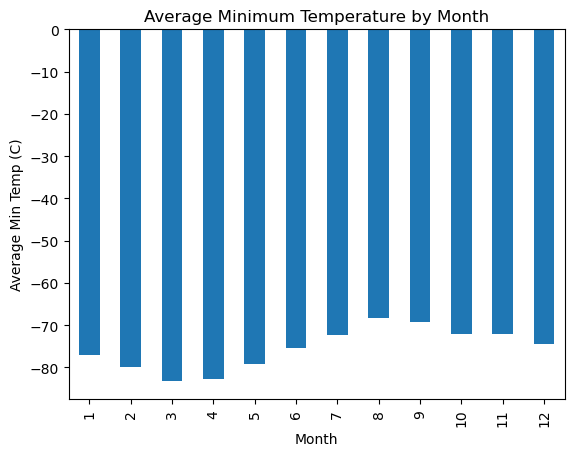

In [17]:
# Plot the average minimum temperature by month
avg_min_temp.plot(kind='bar', title='Average Minimum Temperature by Month', xlabel='Month', ylabel='Average Min Temp (C)')
plt.show()


In [18]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
avg_min_temp_sorted = avg_min_temp.sort_values(ascending=False)

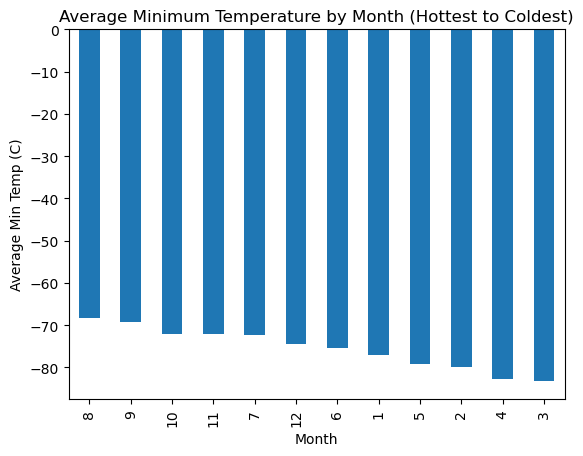

In [19]:
# Plot the coldest and hottest months in Curiosity's location by sorting the previous graph
avg_min_temp_sorted.plot(kind='bar', title='Average Minimum Temperature by Month (Hottest to Coldest)', xlabel='Month', ylabel='Average Min Temp (C)')
plt.show()

In [20]:
# 4. What is the average pressure by month?
avg_pressure = df.groupby('month')['pressure'].mean()
lowest_pressure_month = avg_pressure.idxmin()
highest_pressure_month = avg_pressure.idxmax()
print(f"The month with the lowest atmospheric pressure on Mars is month {lowest_pressure_month}.")
print(f"The month with the highest atmospheric pressure on Mars is month {highest_pressure_month}.")


The month with the lowest atmospheric pressure on Mars is month 6.
The month with the highest atmospheric pressure on Mars is month 9.


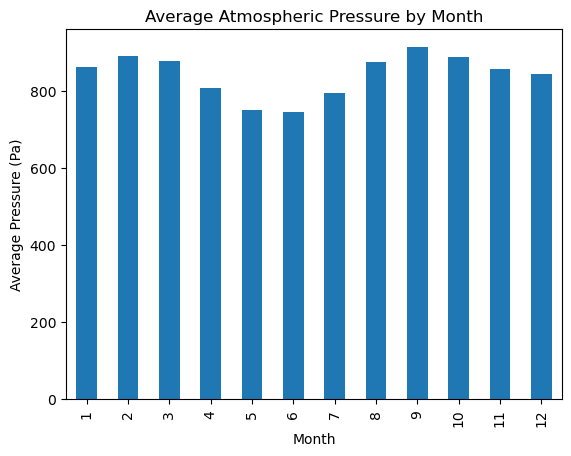

In [21]:
# Plot the average pressure by month
avg_pressure.plot(kind='bar', title='Average Atmospheric Pressure by Month', xlabel='Month', ylabel='Average Pressure (Pa)')
plt.show()

In [22]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
terrestrial_days = df['terrestrial_date'].max() - df['terrestrial_date'].min()
print(f"There are approximately {terrestrial_days.days} terrestrial days in a Martian year.")

There are approximately 2021 terrestrial days in a Martian year.


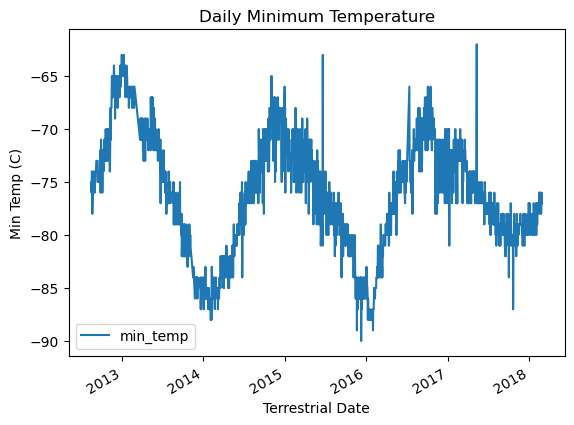

In [23]:
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
df.plot(x='terrestrial_date', y='min_temp', title='Daily Minimum Temperature', xlabel='Terrestrial Date', ylabel='Min Temp (C)')
plt.show()

#### Minimum Temperature

-68.382979 average for month 8

#### Atmospheric Pressure

The month with the lowest atmospheric pressure on Mars is month 6.
The month with the highest atmospheric pressure on Mars is month 9.

#### Year Length

A martian year lenth equal 2021 terrestial earth days, or approximatly 5 terrestial years for 1 mars year.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [24]:
# Write the data to a CSV
df.to_csv("mars_weather_VHR.csv", index=False)

In [25]:
browser.quit()